# Support Vector Machines
Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or for regression. SVMs are a discriminative classifier: that is, they draw a boundary between clusters of data.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'grid.linestyle': ':'})

Let's show a quick example of support vector classification. First we need to create a dataset:

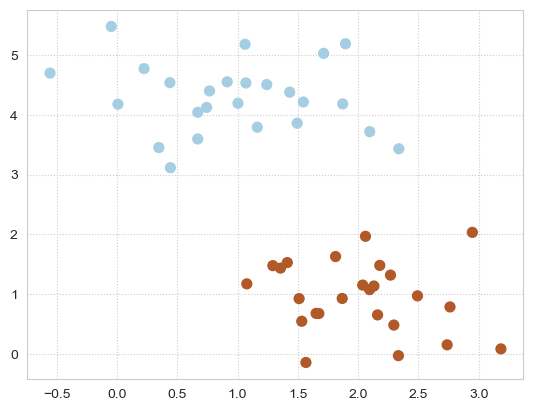

In [75]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

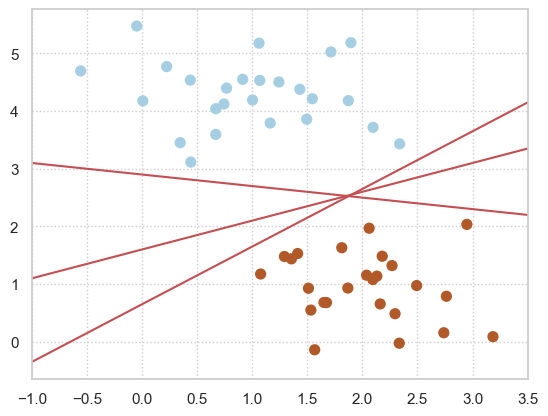

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-r')

plt.xlim(-1, 3.5);

These are three very different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

### Support Vector Machines: Maximising the Margin
Support vector machines are one way to address this. What support vector machined do is to not only draw a line, but consider a region about the line of some given width. Here's an example of what it might look like:

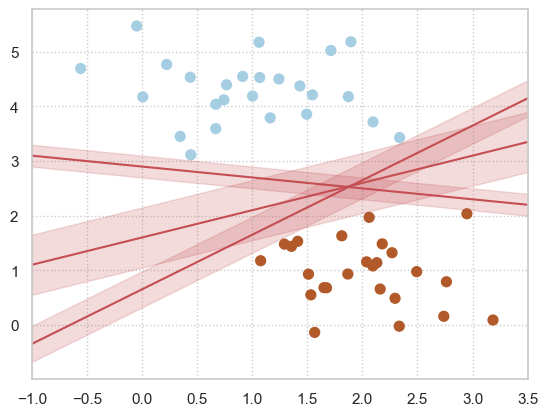

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-r')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='r', alpha=0.2)

plt.xlim(-1, 3.5);

Notice here that if we want to maximise this width, the middle fit is clearly the best. This is the intuition of support vector machines, which optimise a linear discriminant model in conjunction with a margin representing the perpendicular distance between the datasets.

### Fitting a Support Vector Machine
Now we'll fit a Support Vector Machine Classifier to these points. While the mathematical details of the likelihood model are interesting, we'll let you read about those elsewhere. Instead, we'll just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [49]:
from sklearn.svm import SVC  # "Support Vector Classifier"

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

To better visualise what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [20]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

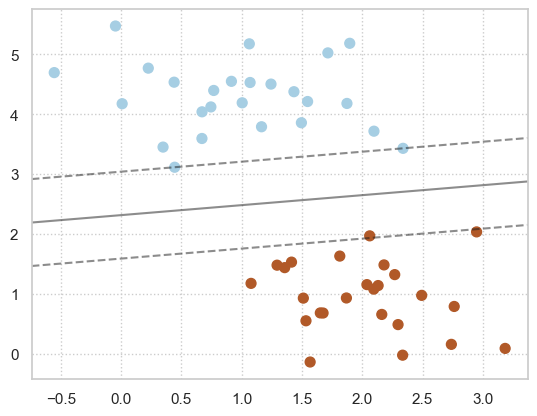

In [104]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf);

Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name). In scikit-learn, these are stored in the `support_vectors_` attribute of the classifier:

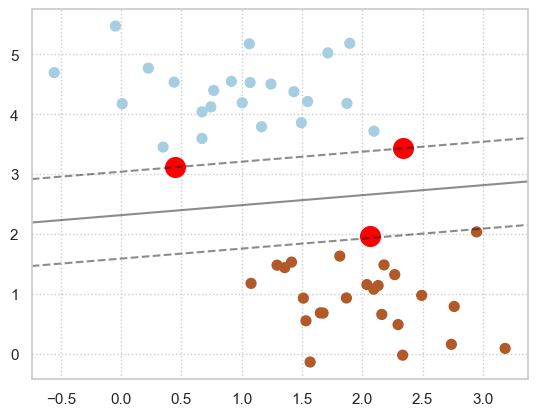

In [105]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='red');

## Going further: Kernel Methods
Where SVM gets incredibly exciting is when it is used in conjunction with kernels. To motivate the need for kernels, let's look at some data which is not linearly separable:

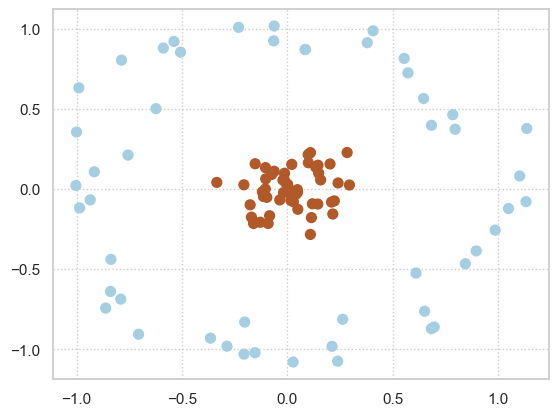

In [106]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

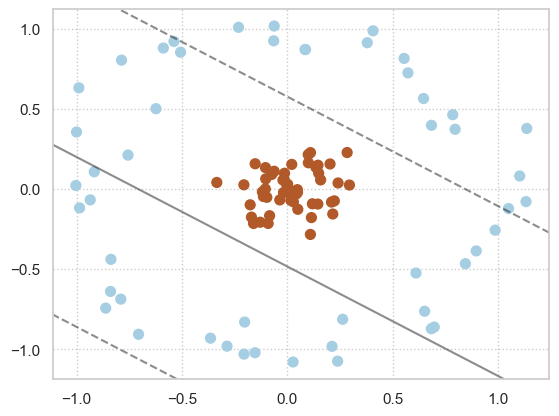

In [107]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
clf = SVC(kernel='linear').fit(X, y)
plot_svc_decision_function(clf);

Clearly, no linear discrimination will ever separate these data. One way we can adjust this is to apply a kernel, which is some functional transformation of the input data.

## Radial basis function

For example, one simple model we could use is a radial basis function

In [109]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

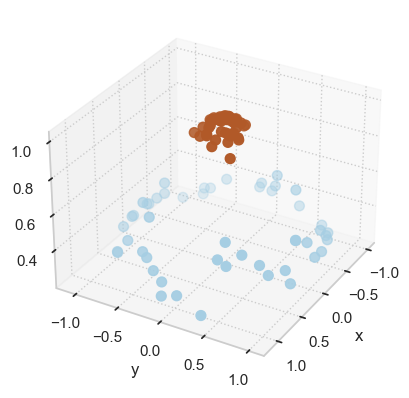

In [110]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

We can see that with this additional dimension, the data becomes trivially linearly separable! 

This is a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. This is accomplished by using `kernel='rbf'`, short for radial basis function:

In [111]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)

SVC(gamma='auto')

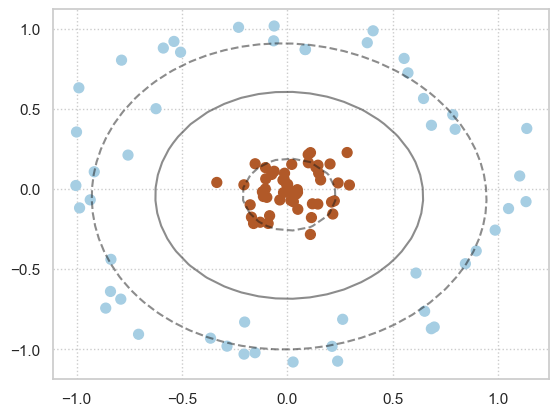

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none');

Here there are effectively $N$ basis functions: one centered at each point! Through a clever mathematical trick, this computation proceeds very efficiently using the "Kernel Trick", without actually constructing the matrix of kernel evaluations.

## Polynomial function

In [113]:
clf_poly = SVC(kernel='poly', degree=4)
clf_poly.fit(X, y)

SVC(degree=4, kernel='poly')

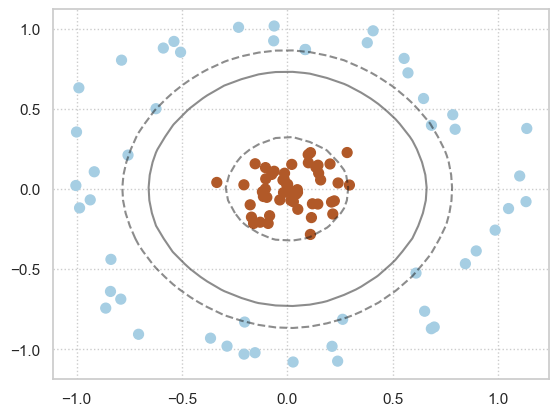

In [114]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf_poly)
plt.scatter(clf_poly.support_vectors_[:, 0], clf_poly.support_vectors_[:, 1], s=200, facecolors='none');

In [115]:
clf_sig = SVC(kernel='sigmoid')
clf_sig.fit(X, y)

SVC(kernel='sigmoid')

## Sigmoid function

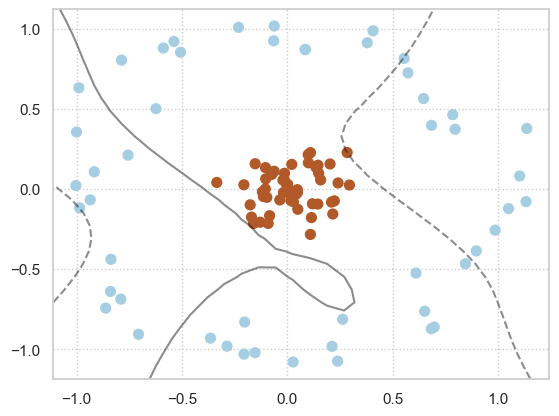

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf_sig)
plt.scatter(clf_sig.support_vectors_[:, 0], clf_sig.support_vectors_[:, 1], s=200, facecolors='none');

## Exercise

### Classification of Iris flowers using SVM
Perform binary classification between *Setosa* and *Virginica* using `sepal_width` and `sepal_length` attributes.


In [3]:
# load Iris dataset
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

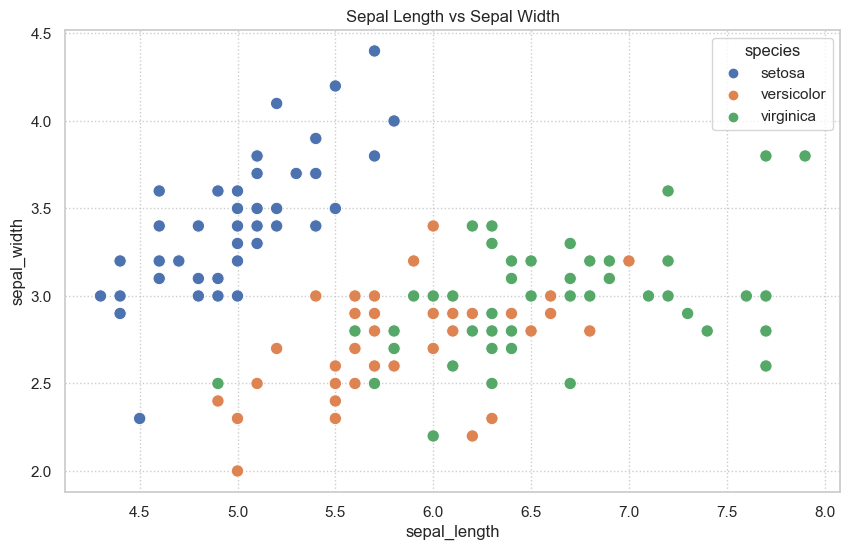

In [59]:
# Sepal plot of all species
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", s=80, hue="species").set(title='Sepal Length vs Sepal Width')

In [10]:
# Select setosa and versicolor
species = ["setosa", "versicolor"]
X = df[df["species"].isin(species)]

# Replace "species" with [0,1]
X.loc[X["species"] == "setosa", "species"] = 1
X.loc[X["species"] == "versicolor", "species"] = 0

# Use "species" as label
y = X["species"]

# Drop "petal_width", "petal_length", "species" from input
X = X.drop(["petal_width", "petal_length", "species"], axis=1)


Let's check our `X` input:

In [12]:
X.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


and our target label `y`:

In [14]:
y

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: species, Length: 100, dtype: object

In [15]:
# Convert dataframe to array
X = X.to_numpy()
y = y.to_numpy()
y = y.astype('int')

Text(0, 0.5, 'Sepal width')

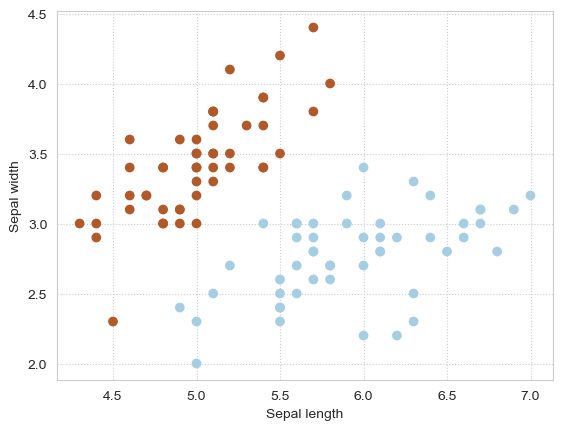

In [16]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [28]:
# Train classifier
from sklearn.svm import SVC
iris_clf = SVC(kernel="linear")
iris_clf.fit(X,y)

SVC(kernel='linear')

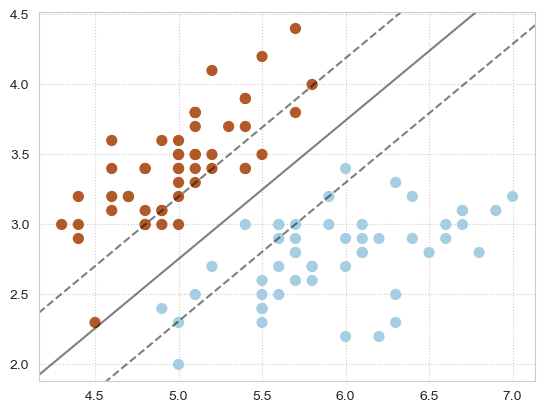

In [29]:
# Plot hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(iris_clf);

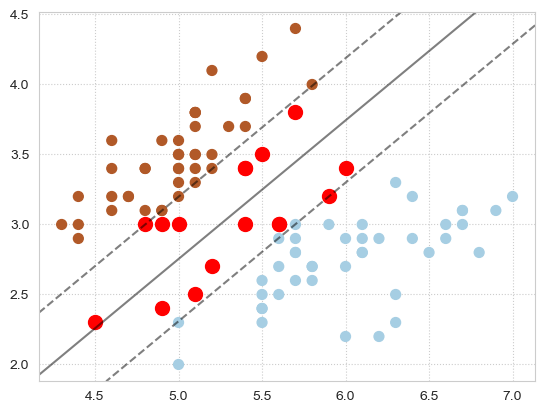

In [30]:
# Highlight support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(iris_clf)
plt.scatter(iris_clf.support_vectors_[:, 0], iris_clf.support_vectors_[:, 1], s=100, facecolors='red');

### Re-train using RBF and Polynomial kernels

In [33]:
iris_clf = SVC(kernel="rbf", gamma="auto")
iris_clf.fit(X,y)

SVC(gamma='auto')

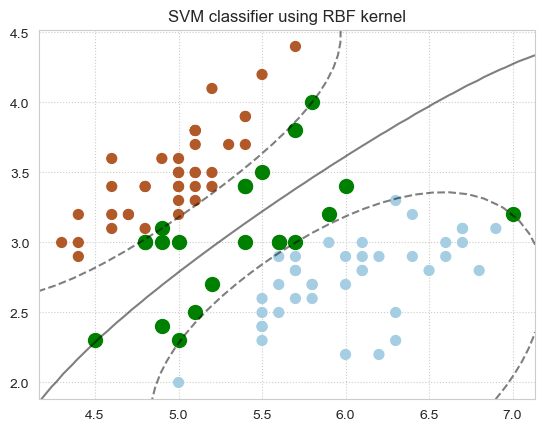

In [38]:
# Highlight support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(iris_clf)
plt.scatter(iris_clf.support_vectors_[:, 0], iris_clf.support_vectors_[:, 1], s=100, facecolors='green')
plt.title("SVM classifier using RBF kernel");

In [39]:
iris_clf = SVC(kernel="poly", degree=4)
iris_clf.fit(X,y)

SVC(degree=4, kernel='poly')

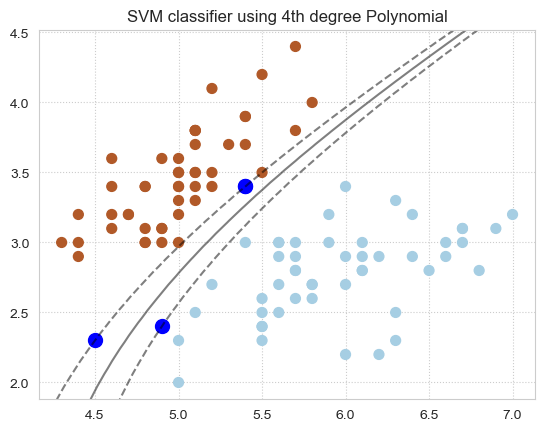

In [41]:
# Highlight support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(iris_clf)
plt.scatter(iris_clf.support_vectors_[:, 0], iris_clf.support_vectors_[:, 1], s=100, facecolors='blue')
plt.title("SVM classifier using 4th degree Polynomial");